In [1]:
# Variables:
!python -m pip install ipywidgets
# !jupyter nbextension enable --py widgetsnbextension

graph_ids = ['6_000', '6_003', '6_312']
graph_ids = ['6_rand_nsga']
input_data_dir = '/home/arenbabikian/git/clevr-dataset-gen/clevr-image-gen'
out_dir = '/home/arenbabikian/git/clevr-iep/data-new-laptop'
default_vocab_path = '/home/arenbabikian/git/clevr-iep/data-graph/default-vocab.json'

In [2]:
%load_ext autoreload
%autoreload 2

In [2]:
%cd ~/git/clevr-iep/scripts

/home/arenbabikian/git/clevr-iep/scripts


In [5]:
# 0 - EXTRACT FEATURES
# ##########

graph_ids = ['6_000', '6_003', '6_312', '6_rand_nsga']
# graph_ids = ['6_000']
input_data_dir = '/home/arenbabikian/git/clevr-dataset-gen/clevr-image-gen'
out_dir = '/home/arenbabikian/git/clevr-iep/data-new-laptop'

for graph_id in graph_ids[:]:
    image_dir = f'{input_data_dir}/{graph_id}/images'
    out_h5_dir = f'{out_dir}/{graph_id}/feats'

    !mkdir -p {out_h5_dir}
    %run extract_features \
        --input_image_dir {image_dir} \
        --use_gpu 1 \
        --get_every_layer 1 \
        --model resnet101 \
        --model_stage 3 \
        --batch_size 16 \
        --output_h5_dir {out_h5_dir} \
        --output_h5_prefix k-resnet101
  
  # --output_h5_dir data/distinct \

250 images to be processed


/home/arenbabikian/git/clevr-iep/scripts/extract_features.py:122: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imread(path, pilmode='RGB')


Processed 16 / 250 images
Processed 32 / 250 images
Processed 48 / 250 images
Processed 64 / 250 images
Processed 80 / 250 images
Processed 96 / 250 images
Processed 112 / 250 images
Processed 128 / 250 images
Processed 144 / 250 images
Processed 160 / 250 images
Processed 176 / 250 images
Processed 192 / 250 images
Processed 208 / 250 images
Processed 224 / 250 images
Processed 240 / 250 images
Processed 250 / 250 images
250 images to be processed


/home/arenbabikian/git/clevr-iep/scripts/extract_features.py:122: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imread(path, pilmode='RGB')


Processed 16 / 250 images
Processed 32 / 250 images
Processed 48 / 250 images
Processed 64 / 250 images
Processed 80 / 250 images
Processed 96 / 250 images
Processed 112 / 250 images
Processed 128 / 250 images
Processed 144 / 250 images
Processed 160 / 250 images
Processed 176 / 250 images
Processed 192 / 250 images
Processed 208 / 250 images
Processed 224 / 250 images
Processed 240 / 250 images
Processed 250 / 250 images
250 images to be processed


/home/arenbabikian/git/clevr-iep/scripts/extract_features.py:122: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imread(path, pilmode='RGB')


Processed 16 / 250 images
Processed 32 / 250 images
Processed 48 / 250 images
Processed 64 / 250 images
Processed 80 / 250 images
Processed 96 / 250 images
Processed 112 / 250 images
Processed 128 / 250 images
Processed 144 / 250 images
Processed 160 / 250 images
Processed 176 / 250 images
Processed 192 / 250 images
Processed 208 / 250 images
Processed 224 / 250 images
Processed 240 / 250 images
Processed 250 / 250 images
250 images to be processed


/home/arenbabikian/git/clevr-iep/scripts/extract_features.py:122: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imread(path, pilmode='RGB')


Processed 16 / 250 images
Processed 32 / 250 images
Processed 48 / 250 images
Processed 64 / 250 images
Processed 80 / 250 images
Processed 96 / 250 images
Processed 112 / 250 images
Processed 128 / 250 images
Processed 144 / 250 images
Processed 160 / 250 images
Processed 176 / 250 images
Processed 192 / 250 images
Processed 208 / 250 images
Processed 224 / 250 images
Processed 240 / 250 images
Processed 250 / 250 images


In [8]:
# 1 - PREPROCESS QUESTIONS
# ##########
graph_ids = ['6_000', '6_003', '6_312', '6_rand_nsga']
# graph_ids = ['6_rand_nsga']
question_suffixes = ['obj-cnt', 'obj-ex', 'rel-cnt', 'rel-ex']
input_data_dir = '/home/arenbabikian/git/clevr-dataset-gen/clevr-image-gen'
out_dir = '/home/arenbabikian/git/clevr-iep/data-new-laptop'
default_vocab_path = '/home/arenbabikian/git/clevr-iep/data-graph/default-vocab.json'

for graph_id in graph_ids:
    for suffix in question_suffixes:

        question_file = f'{input_data_dir}/{graph_id}/questions/{suffix}.json'
        out_h5_dir = f'{out_dir}/{graph_id}/questions'
        out_vocab_dir = f'{out_h5_dir}/vocab'

        # !echo {question_file}
        # !echo {out_h5_dir}
        !mkdir -p {out_h5_dir}
        !mkdir -p {out_vocab_dir}

        %run preprocess_questions \
            --input_questions_json {question_file} \
            --input_vocab_json {default_vocab_path} \
            --expand_vocab 1 \
            --output_h5_file {out_h5_dir}/{suffix}.h5 \
            --output_vocab_json {out_vocab_dir}/{suffix}.json \
            --encode_unk 1 \
            --mode prefix

/home/arenbabikian/git/clevr-dataset-gen/clevr-image-gen/6_000/questions/obj-cnt.json
/home/arenbabikian/git/clevr-iep/data-new-laptop/6_000/questions
Loading data
Building vocab
Loading vocab
Found 0 new words
Encoding data
Writing output
(4000, 9)
(4000, 6)
/home/arenbabikian/git/clevr-dataset-gen/clevr-image-gen/6_000/questions/obj-ex.json
/home/arenbabikian/git/clevr-iep/data-new-laptop/6_000/questions
Loading data
Building vocab
Loading vocab
Found 0 new words
Encoding data
Writing output
(4000, 8)
(4000, 6)
/home/arenbabikian/git/clevr-dataset-gen/clevr-image-gen/6_000/questions/rel-cnt.json
/home/arenbabikian/git/clevr-iep/data-new-laptop/6_000/questions
Loading data
Building vocab
Loading vocab
Found 0 new words
Encoding data
Writing output
(77120, 17)
(77120, 10)
/home/arenbabikian/git/clevr-dataset-gen/clevr-image-gen/6_000/questions/rel-ex.json
/home/arenbabikian/git/clevr-iep/data-new-laptop/6_000/questions
Loading data
Building vocab
Loading vocab
Found 0 new words
Encodin

In [5]:
# 2 - GET SOLUTION FROM FEATS
# ##########

graph_ids = ['6_000', '6_003', '6_312', '6_rand_nsga']
# graph_ids = ['6_000', '6_003', '6_312']

question_suffixes = ['obj-cnt', 'obj-ex', 'rel-cnt', 'rel-ex']
approach = 'resnet101'

models_dir = '/home/arenbabikian/git/clevr-iep/models/CLEVR'
out_dir = '/home/arenbabikian/git/clevr-iep/data-new-laptop'

for graph_id in graph_ids[:1]:
    for suffix in question_suffixes[2:3]:

        input_questions_file = f'{out_dir}/{graph_id}/questions/{suffix}.h5'
        input_features_file = f'{out_dir}/{graph_id}/feats/k-{approach}_0_250.h5' # TODO parametrize numbers
        input_vocab_path = f'{out_dir}/{graph_id}/questions/vocab/{suffix}.json'

        out_ans_dir = f'{out_dir}-agas/{graph_id}/answers/{approach}/{suffix}'
        !mkdir -p {out_ans_dir}
        max_i = 100 if suffix.startswith('rel') else 250

        # TODO make decoder a parameter
        # TODO make output dir specification more parametrized
        
        %run answer_qs_from_features \
            --models_dir {models_dir} \
            --use_gpu 1 \
            --questions_interval 1 \
            --num_images {max_i} \
            --questions_file {input_questions_file} \
            --image_features {input_features_file} \
            --vocab_json {input_vocab_path} \
            --output_dir {out_ans_dir}
            
            
            # \
            # --only_extract_stem_feats


  0%|          | 0/3 [00:00<?, ?it/s]

Loading program generator from  program_generator_9k.pt
Loading execution engine from  execution_engine_9k.pt
Loading image features from  /home/arenbabikian/git/clevr-iep/data-new-laptop/6_000/feats/k-resnet101_0_250.h5
Loading question from  /home/arenbabikian/git/clevr-iep/data-new-laptop/6_000/questions/rel-cnt.h5


  0%|          | 0/3 [00:00<?, ?it/s]

torch.Size([1, 17])
torch.Size([1, 1024, 14, 14])


In [15]:
# 3 - ANALYSE IMAGE SUBSET

question_suffixes = ['obj-cnt', 'obj-ex', 'rel-cnt', 'rel-ex']
encoder = 'resnet101'
decoders = ['9k', '18k', '700k_strong']

default_vocab_path = '/mnt/c/git/clevr-iep/data/default-vocab.json'
data_dir = '/mnt/c/git/clevr-iep/data-graph/6_rand_nsga'
question_dir = '/mnt/c/git/clevr-dataset-gen/clevr-image-gen/6_rand_nsga'
answer_dir = 'answers/'

parallels_dir = '/mnt/c/git/clevr-iep/data-graph'
figs_dir = '/mnt/c/git/clevr-iep/data-graph/figs'

for suffix in question_suffixes[:]:
    for decoder in decoders[:]:
        
        max_i = 100 if suffix.startswith('rel') else 250

        %run analyse_image_subsets \
            --encoder {encoder} \
            --decoder_name {decoder} \
            --answers_name {answer_dir} \
            --suffix {suffix} \
            --images_min 0 \
            --images_max {max_i} \
            --vocab_json {default_vocab_path} \
            --data_dir {data_dir} \
            --questions_dir {question_dir} \
            --parallels_dir {parallels_dir} \
            --num_random_plots 200 \
            --figs_dir {figs_dir} \
            --shape_analysis \
            --plot_shape_cvg 
            # --plot_random \
            # --print_global \

            # --encoder_dir {input_encoder_dir} \
            # --rankings_path ${WORKDIR}/rankings \
            # --features_dir ${SRCDIR}/data/distinct-feats

>>> enc=resnet101, dec=9k, qs=answers/, ims=[0..250]
  Measuring Shape Coverage
    Saving plot at /mnt/c/git/clevr-iep/data-graph/figs/resnet101/3-orderings/accuracy/shape-best-0/obj-cnt-250/9k.png
    Saving plot at /mnt/c/git/clevr-iep/data-graph/figs/resnet101/3-orderings/convergence/shape-best-0/obj-cnt-250/9k.png
    Saving plot at /mnt/c/git/clevr-iep/data-graph/figs/resnet101/3-orderings/accuracy/shape-worst-0/obj-cnt-250/9k.png
    Saving plot at /mnt/c/git/clevr-iep/data-graph/figs/resnet101/3-orderings/convergence/shape-worst-0/obj-cnt-250/9k.png
    Saving plot at /mnt/c/git/clevr-iep/data-graph/figs/resnet101/3-orderings/accuracy/shape-best-2147483647/obj-cnt-250/9k.png
    Saving plot at /mnt/c/git/clevr-iep/data-graph/figs/resnet101/3-orderings/convergence/shape-best-2147483647/obj-cnt-250/9k.png
    Saving plot at /mnt/c/git/clevr-iep/data-graph/figs/resnet101/3-orderings/accuracy/shape-worst-2147483647/obj-cnt-250/9k.png
    Saving plot at /mnt/c/git/clevr-iep/data-gra

<Figure size 432x288 with 0 Axes>

In [11]:
# 4 - Do analysis over 6_rand_nsga
input_scene_file = '/mnt/c/git/clevr-dataset-gen/clevr-image-gen/6_rand_nsga/scenes.json'
data_dir = '/mnt/c/git/clevr-iep/data-graph/6_rand_nsga'
parallels_dir = '/mnt/c/git/clevr-iep/data-graph'
question_dir = '/mnt/c/git/clevr-dataset-gen/clevr-image-gen/6_rand_nsga'
figs_dir = '/mnt/c/git/clevr-iep/data-graph/figs'

%run analyse_shape_v_accuracy \
    --input_scene_file {input_scene_file} \
    --data_dir {data_dir} \
    --parallels_dir {parallels_dir} \
    --questions_dir {question_dir} \
    --images_min 0 \
    --figs_dir {figs_dir} \
    --save_accuracy_2_shape
    
    # \
    # --save_f1 \
    # --save_manhattan \
    # --save_cosine_sim \
    # --save_num_2_acc

>>> enc=resnet101, dec=9k, qs=obj-cnt, ims=[0..250]
{'0': {'0010001000000001100011000': 0, '1000110000001001000000100': 1, '0000010000000011010001010': 2, '0011100100010100000000000': 3, '0001100010000000111000000': 4, '1010010000001001000001000': 5, '0010000011000000010001010': 6, '0100101000001011000000000': 7, '0001010010100001010000000': 8, '0000100010000000110000101': 9, '0010001011001000000001000': 10, '0001100100100001010000000': 11, '0011000011010000010000000': 12, '1110000000010001010000000': 13, '0011000010000001110000000': 14, '1100100000100001010000000': 15, '0011010010001001000000000': 16, '0100001010100001010000000': 17, '0110000010000001010000010': 18, '0110001010001001000000000': 19, '0110100010001000000000001': 20, '0011100011001000000000000': 21, '1110100000010100000000000': 22, '1010000000000001110001000': 23, '0000011010001001000000100': 24, '0000101100001001000000100': 25, '0000010010100000010001001': 26, '0000010010000001010000110': 27, '0010000100000001010001010'

250it [00:00, 46325.43it/s]

    Saving csv at /mnt/c/git/clevr-iep/data-graph/figs/resnet101/shape_analysis/accuracy_vs_shape/obj-cnt-250/9k.csv
>>> enc=resnet101, dec=18k, qs=obj-cnt, ims=[0..250]


{'0': {'0010001000000001100011000': 0, '1000110000001001000000100': 1, '0000010000000011010001010': 2, '0011100100010100000000000': 3, '0001100010000000111000000': 4, '1010010000001001000001000': 5, '0010000011000000010001010': 6, '0100101000001011000000000': 7, '0001010010100001010000000': 8, '0000100010000000110000101': 9, '0010001011001000000001000': 10, '0001100100100001010000000': 11, '0011000011010000010000000': 12, '1110000000010001010000000': 13, '0011000010000001110000000': 14, '1100100000100001010000000': 15, '0011010010001001000000000': 16, '0100001010100001010000000': 17, '0110000010000001010000010': 18, '0110001010001001000000000': 19, '0110100010001000000000001': 20, '0011100011001000000000000': 21, '1110100000010100000000000': 22, '1010000000000001110001000': 23, '0000011010001001000000100': 24, '0000101100001001000000100': 25, '0000010010100000010001001': 26, '0000010010000001010000110': 27, '0010000100000001010001010': 28, '0000010000010010010001001': 29, '000010010000

250it [00:00, 34580.22it/s]

    Saving csv at /mnt/c/git/clevr-iep/data-graph/figs/resnet101/shape_analysis/accuracy_vs_shape/obj-cnt-250/18k.csv
>>> enc=resnet101, dec=700k_strong, qs=obj-cnt, ims=[0..250]


{'0': {'0010001000000001100011000': 0, '1000110000001001000000100': 1, '0000010000000011010001010': 2, '0011100100010100000000000': 3, '0001100010000000111000000': 4, '1010010000001001000001000': 5, '0010000011000000010001010': 6, '0100101000001011000000000': 7, '0001010010100001010000000': 8, '0000100010000000110000101': 9, '0010001011001000000001000': 10, '0001100100100001010000000': 11, '0011000011010000010000000': 12, '1110000000010001010000000': 13, '0011000010000001110000000': 14, '1100100000100001010000000': 15, '0011010010001001000000000': 16, '0100001010100001010000000': 17, '0110000010000001010000010': 18, '0110001010001001000000000': 19, '0110100010001000000000001': 20, '0011100011001000000000000': 21, '1110100000010100000000000': 22, '1010000000000001110001000': 23, '0000011010001001000000100': 24, '0000101100001001000000100': 25, '0000010010100000010001001': 26, '0000010010000001010000110': 27, '0010000100000001010001010': 28, '0000010000010010010001001': 29, '000010010000

250it [00:00, 39221.10it/s]

    Saving csv at /mnt/c/git/clevr-iep/data-graph/figs/resnet101/shape_analysis/accuracy_vs_shape/obj-cnt-250/700k_strong.csv


NameError: name 'exit' is not defined

In [14]:
# 5 - Do graph comparison analysis
input_data_dir = '/mnt/c/git/clevr-dataset-gen/clevr-image-gen'
out_dir = '/mnt/c/git/clevr-iep/data-graph'
default_vocab_path = '/mnt/c/git/clevr-iep/data/default-vocab.json'

%run analyse_graph_comparison \
    --data_dir {out_dir} \
    --questions_dir {input_data_dir} \
    --vocab_json {default_vocab_path} \
    --images_min 0 \
    --images_max 250 \
    --figs_dir {out_dir}/figs \
    --save_graph_2_accuracy_distrib \
    --save_graph_2_accuracy \
    --save_stat_sig

    #\
    # --print_accuracy

>>> enc=resnet101, dec=9k, qs=obj-cnt, graph=6_000, ims=[0..250]
>>> enc=resnet101, dec=9k, qs=obj-cnt, graph=6_003, ims=[0..250]
>>> enc=resnet101, dec=9k, qs=obj-cnt, graph=6_312, ims=[0..250]
>>> enc=resnet101, dec=9k, qs=obj-cnt, graph=6_rand_nsga, ims=[0..250]


250it [00:00, 178785.34it/s]
250it [00:00, 179335.73it/s]
250it [00:00, 175640.87it/s]
250it [00:00, 158108.56it/s]


    Saving plot at /mnt/c/git/clevr-iep/data-graph/figs/resnet101/5-graph-2-accuracy-new/obj-cnt-250/9k.png
    Saving plot at /mnt/c/git/clevr-iep/data-graph/figs/resnet101/5-graph-2-acc-distrib/obj-cnt-250/9k.png
    Saving statistical significance measurements at /mnt/c/git/clevr-iep/data-graph/figs/resnet101/5-stat-sig/obj-cnt-250/9k.txt
>>> enc=resnet101, dec=18k, qs=obj-cnt, graph=6_000, ims=[0..250]
>>> enc=resnet101, dec=18k, qs=obj-cnt, graph=6_003, ims=[0..250]
>>> enc=resnet101, dec=18k, qs=obj-cnt, graph=6_312, ims=[0..250]
>>> enc=resnet101, dec=18k, qs=obj-cnt, graph=6_rand_nsga, ims=[0..250]


250it [00:00, 113384.08it/s]
250it [00:00, 119183.45it/s]
250it [00:00, 54775.95it/s]
250it [00:00, 230203.29it/s]


    Saving plot at /mnt/c/git/clevr-iep/data-graph/figs/resnet101/5-graph-2-accuracy-new/obj-cnt-250/18k.png
    Saving plot at /mnt/c/git/clevr-iep/data-graph/figs/resnet101/5-graph-2-acc-distrib/obj-cnt-250/18k.png
    Saving statistical significance measurements at /mnt/c/git/clevr-iep/data-graph/figs/resnet101/5-stat-sig/obj-cnt-250/18k.txt
>>> enc=resnet101, dec=700k_strong, qs=obj-cnt, graph=6_000, ims=[0..250]
>>> enc=resnet101, dec=700k_strong, qs=obj-cnt, graph=6_003, ims=[0..250]
>>> enc=resnet101, dec=700k_strong, qs=obj-cnt, graph=6_312, ims=[0..250]
>>> enc=resnet101, dec=700k_strong, qs=obj-cnt, graph=6_rand_nsga, ims=[0..250]


250it [00:00, 94101.77it/s]
250it [00:00, 235212.20it/s]
250it [00:00, 305796.44it/s]
250it [00:00, 198218.53it/s]


    Saving plot at /mnt/c/git/clevr-iep/data-graph/figs/resnet101/5-graph-2-accuracy-new/obj-cnt-250/700k_strong.png
    Saving plot at /mnt/c/git/clevr-iep/data-graph/figs/resnet101/5-graph-2-acc-distrib/obj-cnt-250/700k_strong.png
    Saving statistical significance measurements at /mnt/c/git/clevr-iep/data-graph/figs/resnet101/5-stat-sig/obj-cnt-250/700k_strong.txt
>>> enc=resnet101, dec=9k, qs=obj-ex, graph=6_000, ims=[0..250]
>>> enc=resnet101, dec=9k, qs=obj-ex, graph=6_003, ims=[0..250]
>>> enc=resnet101, dec=9k, qs=obj-ex, graph=6_312, ims=[0..250]
>>> enc=resnet101, dec=9k, qs=obj-ex, graph=6_rand_nsga, ims=[0..250]


250it [00:00, 203133.67it/s]
250it [00:00, 169809.88it/s]
250it [00:00, 258333.58it/s]
250it [00:00, 179213.13it/s]


    Saving plot at /mnt/c/git/clevr-iep/data-graph/figs/resnet101/5-graph-2-accuracy-new/obj-ex-250/9k.png
    Saving plot at /mnt/c/git/clevr-iep/data-graph/figs/resnet101/5-graph-2-acc-distrib/obj-ex-250/9k.png
    Saving statistical significance measurements at /mnt/c/git/clevr-iep/data-graph/figs/resnet101/5-stat-sig/obj-ex-250/9k.txt
>>> enc=resnet101, dec=18k, qs=obj-ex, graph=6_000, ims=[0..250]
>>> enc=resnet101, dec=18k, qs=obj-ex, graph=6_003, ims=[0..250]
>>> enc=resnet101, dec=18k, qs=obj-ex, graph=6_312, ims=[0..250]
>>> enc=resnet101, dec=18k, qs=obj-ex, graph=6_rand_nsga, ims=[0..250]


250it [00:00, 219275.62it/s]
250it [00:00, 199538.73it/s]
250it [00:00, 305529.14it/s]
250it [00:00, 292980.16it/s]


    Saving plot at /mnt/c/git/clevr-iep/data-graph/figs/resnet101/5-graph-2-accuracy-new/obj-ex-250/18k.png
    Saving plot at /mnt/c/git/clevr-iep/data-graph/figs/resnet101/5-graph-2-acc-distrib/obj-ex-250/18k.png
    Saving statistical significance measurements at /mnt/c/git/clevr-iep/data-graph/figs/resnet101/5-stat-sig/obj-ex-250/18k.txt
>>> enc=resnet101, dec=700k_strong, qs=obj-ex, graph=6_000, ims=[0..250]
>>> enc=resnet101, dec=700k_strong, qs=obj-ex, graph=6_003, ims=[0..250]
>>> enc=resnet101, dec=700k_strong, qs=obj-ex, graph=6_312, ims=[0..250]
>>> enc=resnet101, dec=700k_strong, qs=obj-ex, graph=6_rand_nsga, ims=[0..250]


250it [00:00, 128896.87it/s]
250it [00:00, 77146.56it/s]
250it [00:00, 110063.61it/s]
250it [00:00, 175670.30it/s]


    Saving plot at /mnt/c/git/clevr-iep/data-graph/figs/resnet101/5-graph-2-accuracy-new/obj-ex-250/700k_strong.png
    Saving plot at /mnt/c/git/clevr-iep/data-graph/figs/resnet101/5-graph-2-acc-distrib/obj-ex-250/700k_strong.png
    Saving statistical significance measurements at /mnt/c/git/clevr-iep/data-graph/figs/resnet101/5-stat-sig/obj-ex-250/700k_strong.txt


NameError: name 'exit' is not defined

<Figure size 432x288 with 0 Axes>

/home/arenbabikian/git/clevr-iep/.env/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loading image features from  /home/arenbabikian/git/clevr-iep/data-new-laptop/6_000/feats/k-resnet101_0_250.h5


/home/arenbabikian/git/clevr-iep/.env/lib/python3.10/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/home/arenbabikian/git/clevr-iep/.env/lib/python3.10/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/home/arenbabikian/git/clevr-iep/.env/lib/python3.10/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


Loading image features from  /home/arenbabikian/git/clevr-iep/data-new-laptop/6_003/feats/k-resnet101_0_250.h5


/home/arenbabikian/git/clevr-iep/.env/lib/python3.10/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/home/arenbabikian/git/clevr-iep/.env/lib/python3.10/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/home/arenbabikian/git/clevr-iep/.env/lib/python3.10/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


Loading image features from  /home/arenbabikian/git/clevr-iep/data-new-laptop/6_312/feats/k-resnet101_0_250.h5


/home/arenbabikian/git/clevr-iep/.env/lib/python3.10/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/home/arenbabikian/git/clevr-iep/.env/lib/python3.10/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/home/arenbabikian/git/clevr-iep/.env/lib/python3.10/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


Loading image features from  /home/arenbabikian/git/clevr-iep/data-new-laptop/6_rand_nsga/feats/k-resnet101_0_250.h5


/home/arenbabikian/git/clevr-iep/.env/lib/python3.10/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/home/arenbabikian/git/clevr-iep/.env/lib/python3.10/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/home/arenbabikian/git/clevr-iep/.env/lib/python3.10/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


  Preicting if 6_rand_nsga fits in 6_000
    Approach: IsolationForest()
      Rep #0, original torch.Size([250, 200704]): 250 inliers, 0 outliers
      Rep #1, svd (250, 64): 249 inliers, 1 outliers
      Rep #2, pca (250, 64): 250 inliers, 0 outliers
      Rep #3, x-m (250, 2): 133 inliers, 117 outliers
      Rep #4, x-t (250, 2): 191 inliers, 59 outliers
      Rep #5, s-m (250, 2): 162 inliers, 88 outliers
      Rep #6, s-t (250, 2): 190 inliers, 60 outliers
      Rep #7, p-m (250, 2): 157 inliers, 93 outliers
      Rep #8, p-t (250, 2): 201 inliers, 49 outliers
    Approach: OneClassSVM()
      Rep #0, original torch.Size([250, 200704]): 70 inliers, 180 outliers
      Rep #1, svd (250, 64): 120 inliers, 130 outliers
      Rep #2, pca (250, 64): 116 inliers, 134 outliers
      Rep #3, x-m (250, 2): 118 inliers, 132 outliers
      Rep #4, x-t (250, 2): 145 inliers, 105 outliers
      Rep #5, s-m (250, 2): 128 inliers, 122 outliers
      Rep #6, s-t (250, 2): 172 inliers, 78 outliers


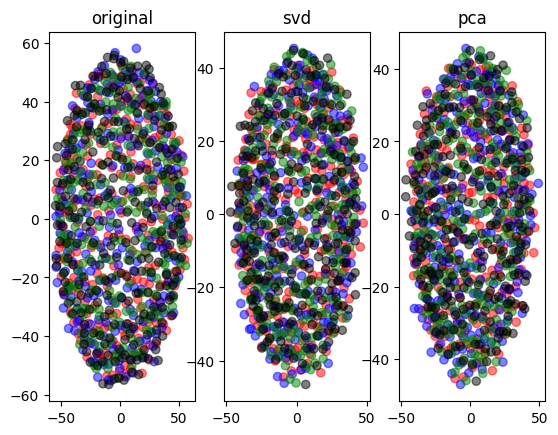

<<<<tsne2>>>>


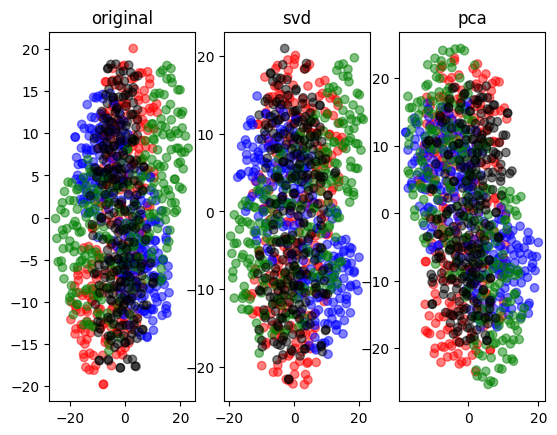

In [4]:
# 6 - Do MDS analysis of features
# ##########

out_dir = '/home/arenbabikian/git/clevr-iep/data-new-laptop'
encoder = 'resnet101'
feats_name = 'feats'

%run analysis/analyse_features.py \
    --data_dir {out_dir} \
    --feats_name {feats_name} \
    --encoder {encoder} \
    --min_index 0 \
    --max_index 250 \
    --figs_dir {out_dir}/figs \
    --num_samples 250 \
    --num_deco_feats 64